<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/CandleStick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Site para verificar todas siglas de ativos
# https://br.financas.yahoo.com/

In [6]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=94a83ac34956ab447f21a181dd1702019ca9898939448e1363f5048a2c875e27
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [8]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.3 MB/s eta 0:00:00


In [11]:
# Caso ainda não tenha algum destes pacotes instalados, basta utilizar os comandos abaixo:
# !pip install pandas_ta
# !pip install mplfinance
# !pip install pandas_datareader
# !pip3 install yfinance

import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
#yf.pdr_override()

import datetime as dt
import pandas_ta as ta # análise técnica das bandas de bollinger


# Gráficos
import mplfinance as mpf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [13]:
# Carregando as cotações
Cotacoes = yf.Ticker("ITUB3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="1mo")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-01 00:00:00-03:00,31.39,31.47,30.75,30.87,472700,0.02,0.00
2024-10-02 00:00:00-03:00,30.88,31.41,30.88,31.07,346500,0.00,0.00
2024-10-03 00:00:00-03:00,30.99,31.00,30.28,30.38,388200,0.00,0.00
2024-10-04 00:00:00-03:00,30.37,30.58,30.25,30.44,313600,0.00,0.00
2024-10-07 00:00:00-03:00,30.62,30.68,30.32,30.50,358600,0.00,0.00


In [14]:
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-28 00:00:00-03:00,30.63,30.97,30.49,30.78,435800,0.00,0.00
2024-10-29 00:00:00-03:00,30.96,31.02,30.45,30.49,269000,0.00,0.00
2024-10-30 00:00:00-03:00,30.43,30.62,30.30,30.36,351700,0.00,0.00
2024-10-31 00:00:00-03:00,30.38,30.55,30.02,30.17,531300,0.00,0.00
2024-11-01 00:00:00-03:00,30.10,30.36,30.02,30.03,338600,0.02,0.00


In [17]:
# Alguns códigos de Ativos para você poder testar depois
# Bitcoin --> BTC-USD
# Vale --> ^BVSP
# Petrobras --> PETR3.SA

#ativos = ["ITUB3.SA", "^BVSP", "BTC-USD"]
ativos = ["ITUB3.SA"]
data_inicial = "2023-01-01"
data_final = "2023-10-23"

#cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)
#cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
#cotacoes.head()

In [18]:
# Preview do resultado das BB
dados.ta.bbands(length=5, std=2.0).head(10)

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2024-10-01 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-02 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-03 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-04 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-07 00:00:00-03:00,30.11,30.65,31.19,3.52,0.36
2024-10-08 00:00:00-03:00,30.12,30.62,31.13,3.29,0.60
2024-10-09 00:00:00-03:00,30.13,30.45,30.78,2.14,0.14
2024-10-10 00:00:00-03:00,30.06,30.43,30.79,2.39,0.26
2024-10-11 00:00:00-03:00,29.95,30.37,30.79,2.79,0.24


In [19]:
# Parâmetros
leng = 5
desv = 2.0

# Definindo dataframe com as BB
df2 = dados.ta.bbands(length=leng, std= desv)

<Axes: xlabel='Date'>

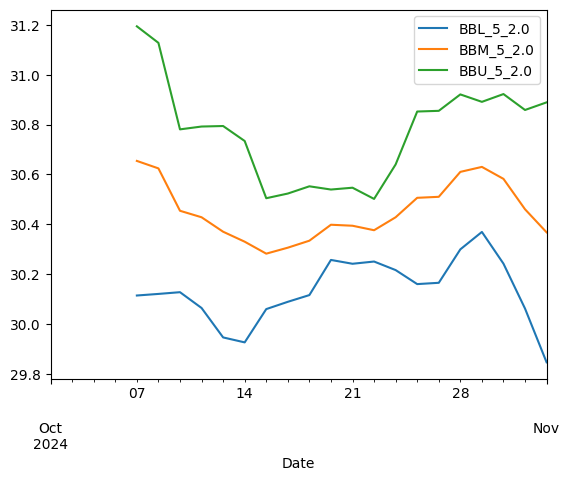

In [20]:
# Plot de diagnóstico
df2.iloc[:,:3].plot()

<Axes: xlabel='Date'>

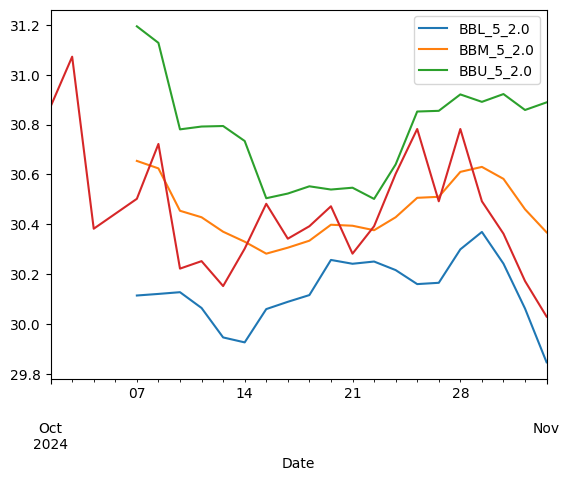

In [21]:
# Plot de preço de fechamento e as bandas de bollinger
(df2).iloc[:,:3].plot()
dados['Close'].plot()

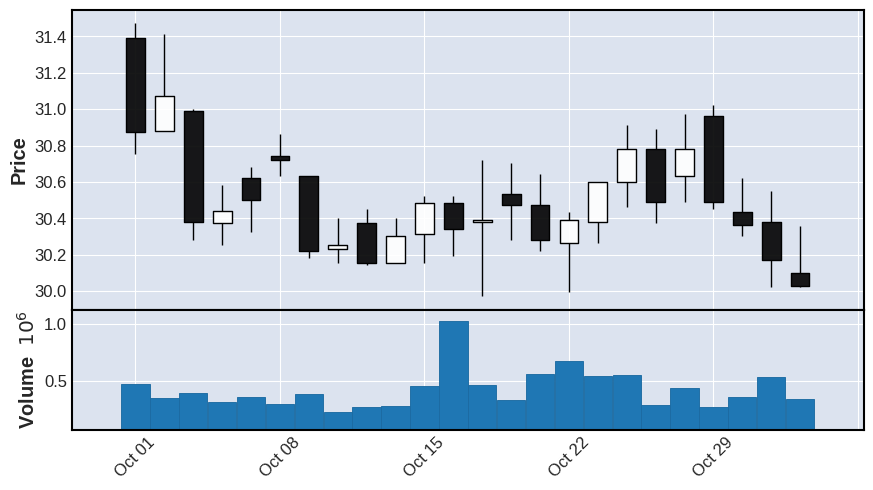

In [22]:
# Plot com as velas de preço

mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True)

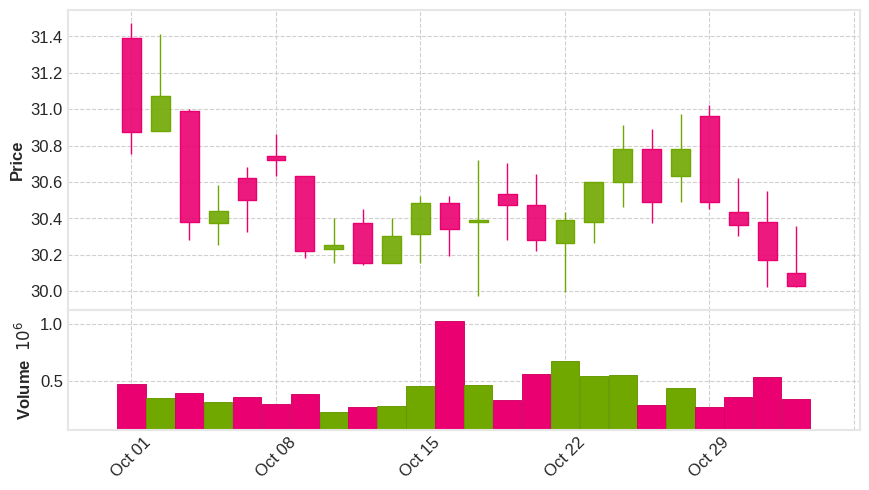

In [23]:
# Estilo Binance

mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='binance')

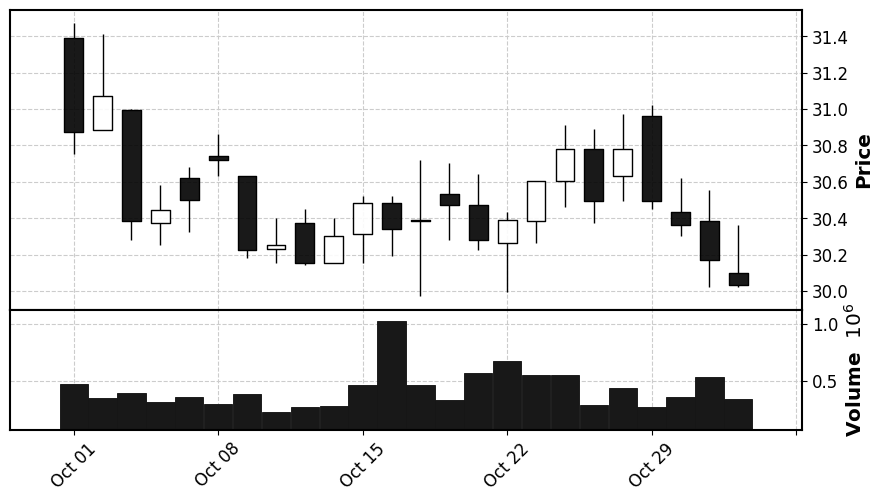

In [24]:
# Estilo classic

mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='classic')

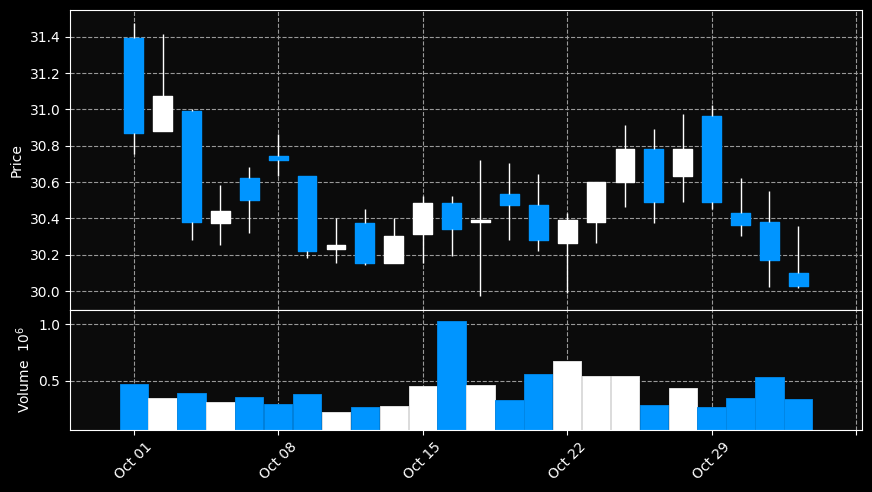

In [25]:
# Estilo nightclouds

mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='nightclouds')

<Axes: xlabel='Date', ylabel='Price'>

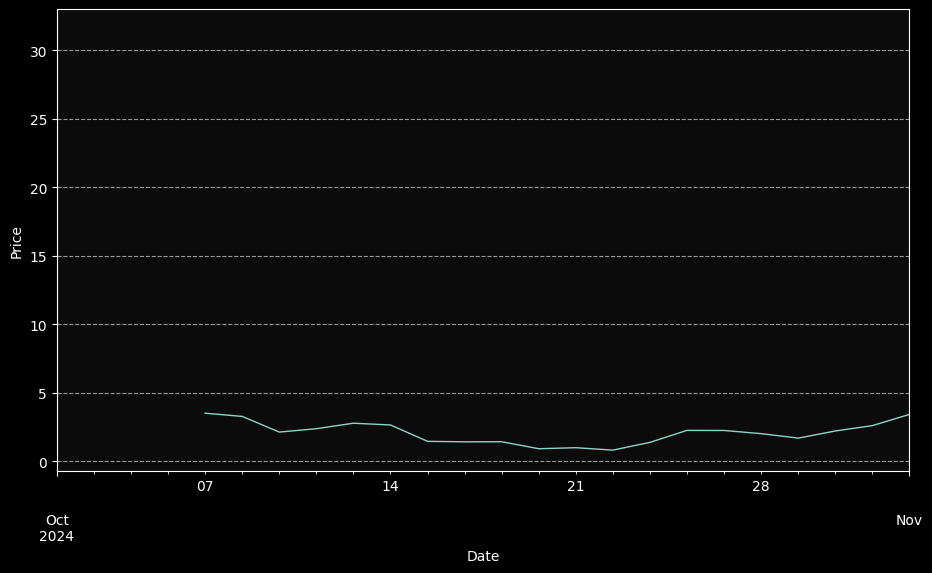

In [26]:
# Adicionando as bandas de bollinger com as velas de preço

fig, ax = plt.subplots(figsize = (11,6))
mpf.plot(dados, type = 'candle', ax= ax)
(df2).iloc[:,3].plot(ax=ax)

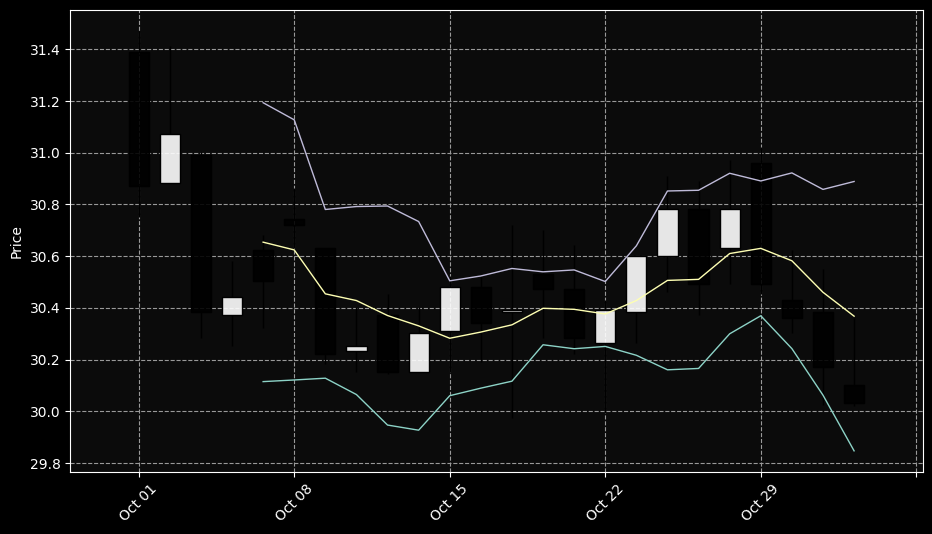

In [27]:
# Adicionando as bandas de bollinger com as velas de preço -  segunda tentativa

fig, ax = plt.subplots(figsize = (11,6))
mpf.plot(dados, type = 'candle', ax= ax)
df2['aux'] = range(0,dados.shape[0])
plt.plot(df2['aux'], df2.iloc[:,:3]);

In [28]:
# Plot básico do plotly
fig1 = px.line(df2,
               x=df2.index,
               y=[f"BBL_{leng}_{desv}",f"BBU_{leng}_{desv}" ,f"BBM_{leng}_{desv}"])
fig1.show()

In [29]:
# Adicionando figura com as velas de preço
fig1 = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Removendo o range slider
fig1.update_layout(xaxis_rangeslider_visible=False)

# adicionando elementos de layout
fig1.update_layout(
    #title = dict(text="Cotação PETR4", font=dict(size=40), automargin=False, yref='paper'),
    title = dict(text="Cotação ITUB3", font=dict(size=40), yref='paper'),
    xaxis_title= dict(text="<b> Data </b>", font=dict(size=30)),
    yaxis_title= dict(text="<b>Preço (R$) </b>", font=dict(size=30)),
    font_family="Courier New",
    font_color="black",
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial Black',
            size=15,
            color='blue',
        ),
    )
)

# Mostrando plot Final
fig1.show()

In [30]:
# Adicionando figura com as velas de preço
fig1 = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Figura com as bandas de bollinger
fig2 = px.line(df2, x=df2.index, y=[f"BBL_{leng}_{desv}",f"BBU_{leng}_{desv}" ,f"BBM_{leng}_{desv}"])

# Unindo as duas figuras
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(xaxis_rangeslider_visible=False)

# adicionando elementos de layout
fig3.update_layout(
    title = dict(text="Cotação ITUB3", font=dict(size=40), yref='paper'),
    xaxis_title= dict(text="<b> Data </b>", font=dict(size=30)),
    yaxis_title= dict(text="<b>Preço (R$) </b>", font=dict(size=30)),
    font_family="Courier New",
    font_color="black",
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    )
)

# Mostrando plot Final
fig3.show()

# Plot de volume
fig4 = px.bar(dados, x=dados.index, y='Volume')
fig4.show()

In [31]:
# Adicionando figura com as velas de preço
fig1 = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Figura com as bandas de bollinger
fig2 = px.line(df2, x=df2.index, y=[f"BBL_{leng}_{desv}",f"BBU_{leng}_{desv}" ,f"BBM_{leng}_{desv}"])

# Unindo as duas figuras
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(xaxis_rangeslider_visible=False)

# adicionando elementos de layout
fig3.update_layout(
    title = dict(text="Cotação ITUB3", font=dict(size=40), yref='paper'),
    xaxis_title= dict(text="<b> Data </b>", font=dict(size=30)),
    yaxis_title= dict(text="<b>Preço (R$) </b>", font=dict(size=30)),
    font_family="Courier New",
    font_color="black",
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    )
)

# Mostrando plot Final
fig3.show()

# Plot de volume
fig4 = px.bar(dados, x=dados.index, y='Volume')
fig4.show()